In [10]:
import pandas as pd 
import numpy as np

# Salary>Build a prediction model for Salary_hike

In [11]:
df1=pd.read_csv('Salary_Data.csv')
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

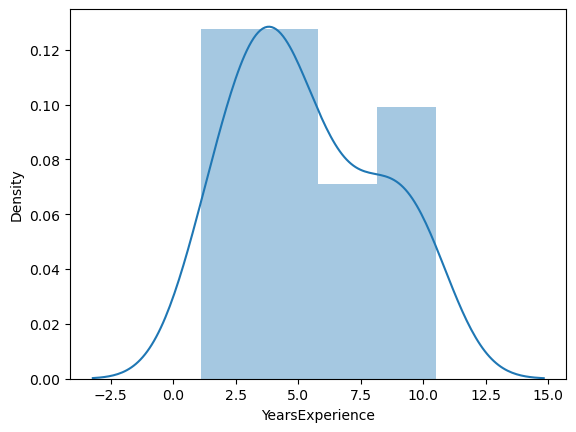

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df1['YearsExperience'])

C:\Users\mario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

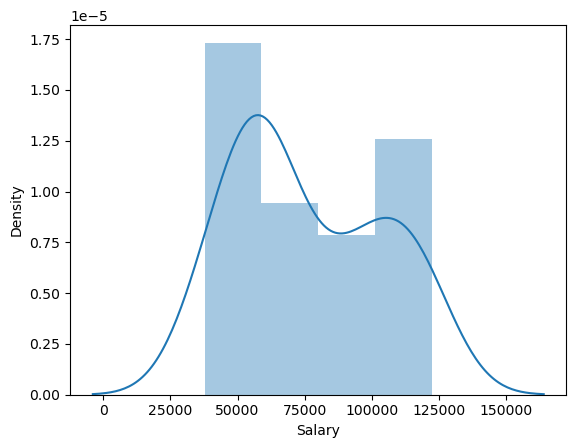

In [14]:
sns.distplot(df1['Salary'])

In [15]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Text(0, 0.5, 'Salary')

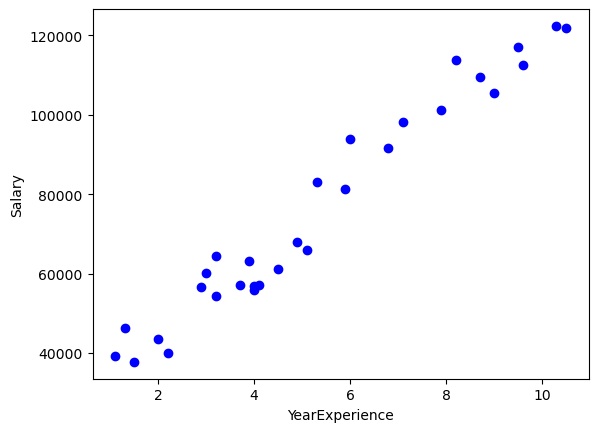

In [20]:
plt.plot(df1.YearsExperience,df1.Salary,"bo")
plt.xlabel('YearExperience')
plt.ylabel('Salary') 

In [22]:
import statsmodels.formula.api as smf

In [23]:
model1=smf.ols("Salary~YearsExperience",data=df1).fit()

In [24]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        18:51:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
pred=model1.predict(df1.YearsExperience)
pred 

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [26]:
rmse=np.sqrt(np.mean(np.array(df1['Salary'])-np.array(pred))**2)
rmse

1.5036979069312415e-11

In [31]:
newdf1=pd.Series([11,13,15,20])

In [32]:
salary_improve=pd.DataFrame(newdf1,columns=['YearsExperience'])
salary_improve

,YearsExperience
0,11
1,13
2,15
3,20


In [33]:
model1.predict(salary_improve)

0    129741.785735
1    148641.710378
2    167541.635020
3    214791.446628
dtype: float64

In [37]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Delivery time>Predict time using sorting time

In [38]:
df2=pd.read_csv('delivery_time.csv')
df2

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [39]:
df2.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [40]:
df2=df2.rename(columns={'Delivery Time':'deliverytime','Sorting Time':'sortingtime'})

In [41]:
df2.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


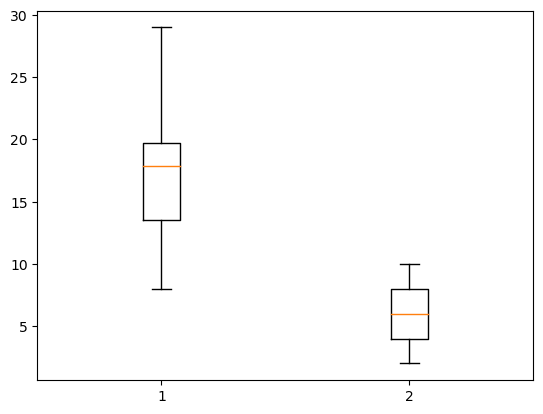

In [27]:
plt.boxplot(data_del)
plt.show()

Text(0, 0.5, 'Delivery Time')

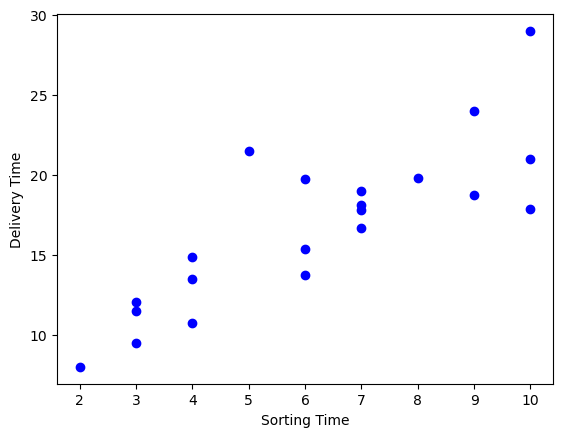

In [45]:
import matplotlib.pyplot as plt
plt.plot(df2['sortingtime'],df2['deliverytime'],'bo')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [48]:
model2=smf.ols("deliverytime~sortingtime",data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        19:11:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model2.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [51]:
pred=model2.predict(df2.sortingtime)
pred 

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [52]:
rmse_df2=np.sqrt(np.mean((np.array(df2['deliverytime'])-np.array(pred)))**2)
rmse_df2

6.767073673905716e-16

Text(0, 0.5, 'DeliveryTime')

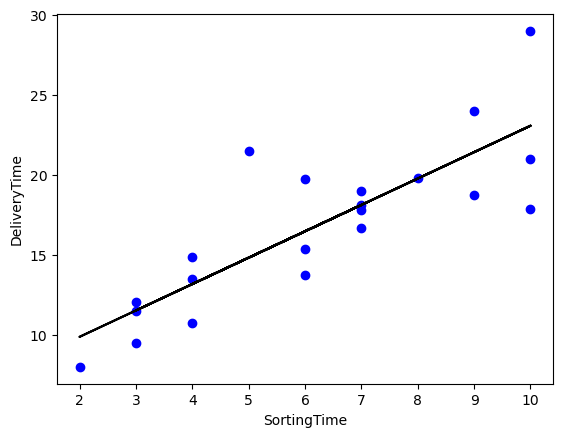

In [58]:
plt.scatter(x=df2['sortingtime'],y=df2['deliverytime'],color='blue')
plt.plot(df2['sortingtime'],pred,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [60]:
model3=smf.ols('deliverytime~np.log(sortingtime)',data=df2).fit()


In [61]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        19:22:27   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
pred2=model3.predict(pd.DataFrame(df2['sortingtime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [64]:
rmse_dflog=np.sqrt(np.mean((np.array(df2['deliverytime'])-np.array(pred2))**2))
rmse_dflog

2.733171476682066

Text(0, 0.5, 'DeliveryTime')

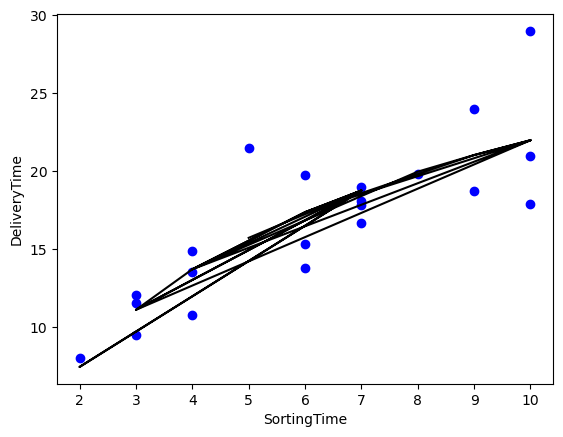

In [65]:
plt.scatter(x=df2['sortingtime'],y=df2['deliverytime'],color='blue')
plt.plot(df2['sortingtime'],pred2,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [67]:
model4=smf.ols('np.log(deliverytime)~sortingtime',data=df2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 13 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                          19:27:40   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
pred3=model4.predict(pd.DataFrame(df2['sortingtime']))
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [71]:
rmse_dfexpo=np.sqrt(np.mean((np.array(df2['deliverytime'])-np.array(pred3))**2))
rmse_dfexpo

14.795516941016686

Text(0, 0.5, 'DeliveryTime')

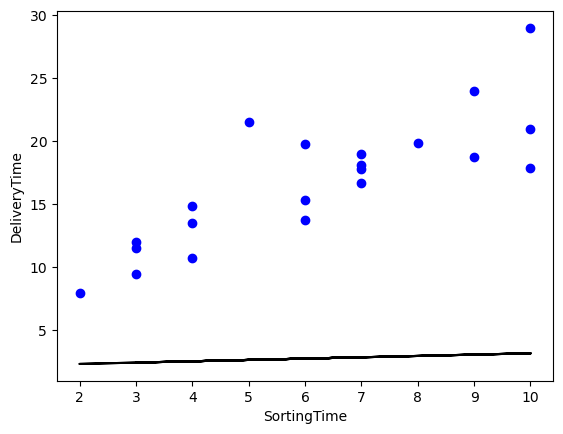

In [72]:
plt.scatter(x=df2['sortingtime'],y=df2['deliverytime'],color='blue')
plt.plot(df2['sortingtime'],pred3,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [73]:
df2['sortingtime_sq']=df2.sortingtime*df2.sortingtime
df2

,deliverytime,sortingtime,sortingtime_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [74]:
model5=smf.ols('np.log(deliverytime)~sortingtime+sortingtime_sq',data=df2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 13 Mar 2023   Prob (F-statistic):           2.20e-06
Time:                          19:35:03   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
sortingtime        0.2659      0.080      3.315      0.004       0.097       0.434
sortingtime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
pred4=model5.predict(df2)
pred4=np.exp(pred4)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [82]:
rmse_dfquad=np.sqrt(np.mean((np.array(df2['deliverytime'])-np.array(pred4))**2))
rmse_dfquad

2.799041988740925

Text(0, 0.5, 'DeliveryTime')

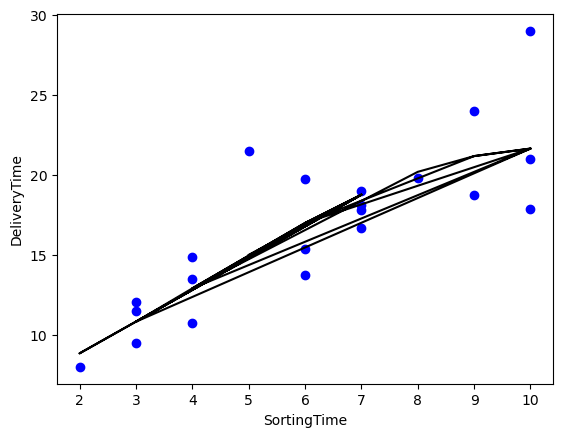

In [85]:
# rmse value is decreased and the rsquare value is increase
plt.scatter(x=df2['sortingtime'],y=df2['deliverytime'],color='blue')
plt.plot(df2['sortingtime'],pred4,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [98]:
df2={"MODEL":pd.Series(['rmse_df2','rmse_dfexpo','rmse_dflog','rmse_dfquad']),
    "RMSE_value":pd.Series([rmse_df2,rmse_dfexpo,rmse_dflog,rmse_dfquad]),
    "Rsquare":pd.Series([model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared])}
table=pd.DataFrame(df2)
table

,MODEL,RMSE_value,Rsquare
0,rmse_df2,6.767074e-16,0.682271
1,rmse_dfexpo,1.479552e+01,0.695443
2,rmse_dflog,2.733171e+00,0.710948
3,rmse_dfquad,2.799042e+00,0.764867


In [86]:
new_df2=pd.Series([11,12,13])

In [34]:
data_del['sortingtime_sq']=data_del.sortingtime*data_del.sortingtime

In [34]:
data_del['sortingtime_sq']=data_del.sortingtime*data_del.sortingtime

In [87]:
df2_pred=pd.DataFrame(new_df2,columns=['sortingtime'])
df2_pred

,sortingtime
0,11
1,12
2,13


In [94]:
model2.predict(df2_pred)

0    24.721953
1    26.370973
2    28.019993
dtype: float64

In [95]:
model5.conf_int(0.5)

,0,1
Intercept,1.542460,1.856949
sortingtime,0.210700,0.321144
sortingtime_sq,-0.017191,-0.008490
